In [1]:
import SCRIPro

In [2]:
import scglue
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")

/fs/home/xuyunfan/miniconda3/envs/scripro0.6/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rna = sc.read_h5ad("/fs/home/xuyunfan/data/10x/lymph2/rna/rna.h5ad")

In [4]:
rna.var_names_make_unique()

In [5]:
rna

AnnData object with n_obs × n_vars = 14566 × 36621

In [6]:
test_data = SCRIPro.Ori_Data(rna,Cell_num=50)

In [7]:
%%time
test_data.get_positive_marker_gene_parallel(cores=4)

CPU times: user 8.05 s, sys: 8.33 s, total: 16.4 s
Wall time: 23.1 s


In [8]:
rna_seq_data = SCRIPro.SCRIPro_RNA(8,'hg38',test_data,assays=['Direct','DNase','H3K27ac'])

In [10]:
rna_seq_data.cal_ISD_cistrome()

In [11]:
rna_seq_data

In [12]:
rna_seq_data.get_P_value_matrix()

In [13]:
rna_seq_data.get_chip_matrix()

In [14]:
target_h5=pd.HDFStore('/fs/home/xuyunfan/data/ALL_target_3.h5')

In [16]:
%%time
rna_seq_data.get_tf(target_h5)

CPU times: user 4min 42s, sys: 997 ms, total: 4min 43s
Wall time: 4min 47s


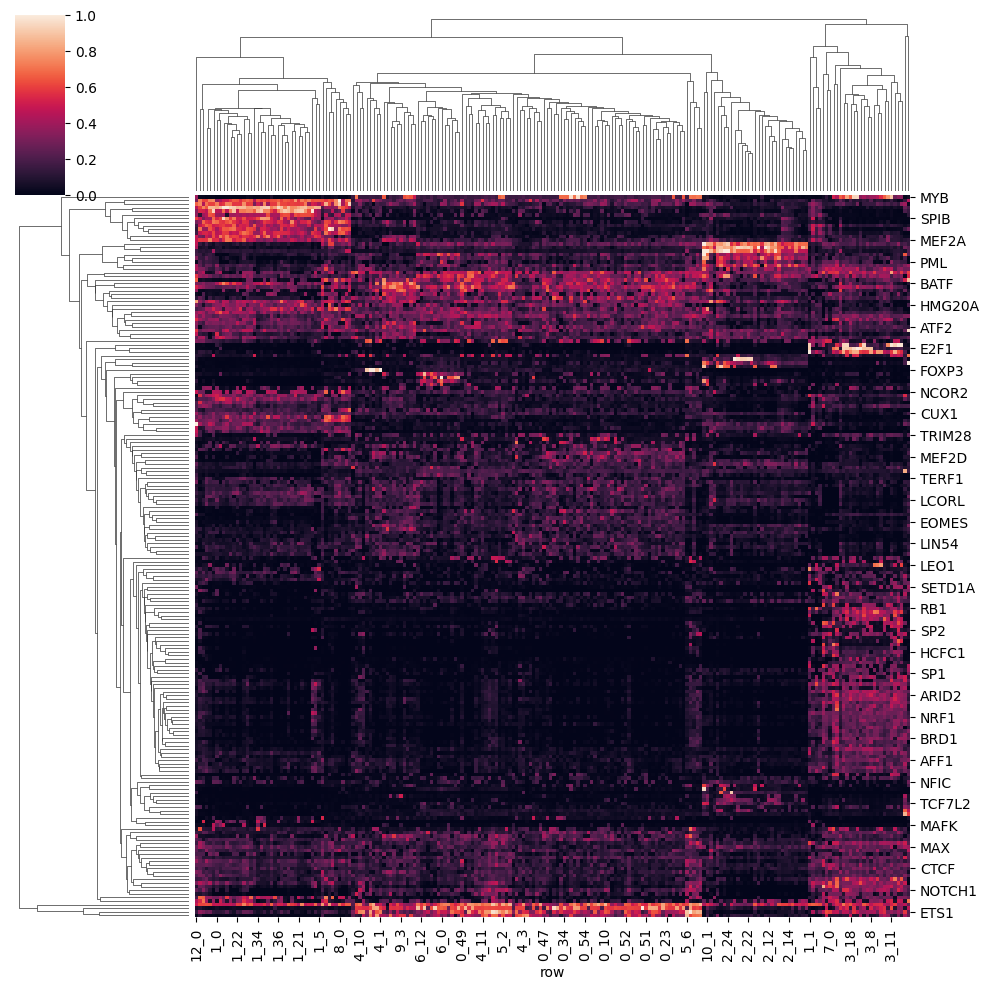

In [24]:
sns.clustermap(rna_seq_data.tf_score.loc[:,rna_seq_data.tf_score.std().sort_values(ascending = False)[0:200].index].T)